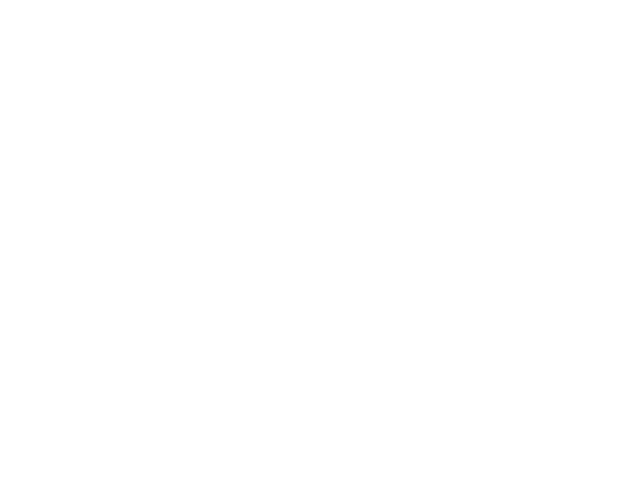

In [2]:
import matplotlib.pyplot as plt, mpld3
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib widget
import scipy.interpolate as ip
from mpld3 import plugins
import seaborn as sns
sns.set(style='ticks', palette='Set2')
import csv
import json
import matplotlib
import pandas as pd
#plt.rcParams['text.usetex'] = True
#plt.rcParams['pgf.texsystem']='xelatex'
plt.rcParams['font.family']='Nimbus Sans'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.default'] = 'it'


#plt.rcParams['text.latex.preamble'] = r'\setmainfont{Nimbus Sans}'

In [75]:
sns.palettes

TypeError: 'module' object is not callable

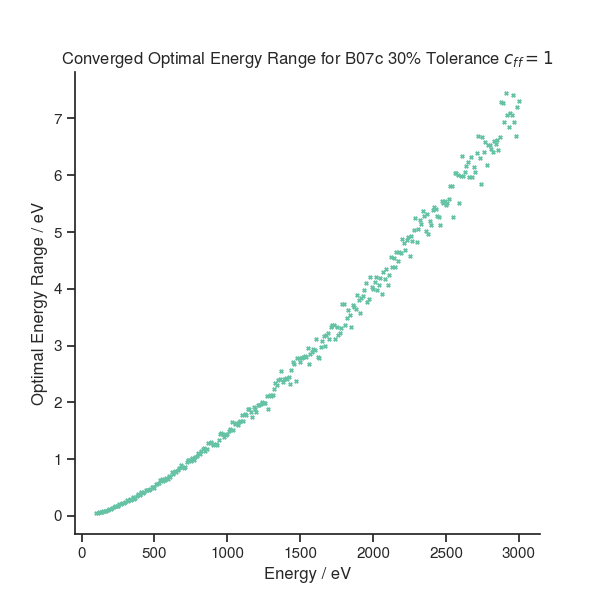

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
x, y = np.loadtxt('./olddata/fwhm2_50bins_10eVstepSize.csv', delimiter=',', unpack=True)
ax.scatter(x,y, s= 6, marker='x')
ax.set_xlabel('Energy / eV')
ax.set_ylabel('Optimal Energy Range / eV')
ax.set_title('Converged Optimal Energy Range for B07c 30% Tolerance $c_\mathit{ff}=1$')
sns.despine()
fig.savefig("Converged.pgf")
#axins = zoomed_inset_axes(ax, 4, loc=1)
#axins.scatter(x,y, s=6, marker='x')
#axins.set_xlim(0,400)
#axins.set_ylim(0, 0.3)
#axins.set_yticks(np.arange(0,0.31,0.01),minor=True)
#mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
#fig.savefig("convergeslit.png", dpi = 300)

array(0.13921001)

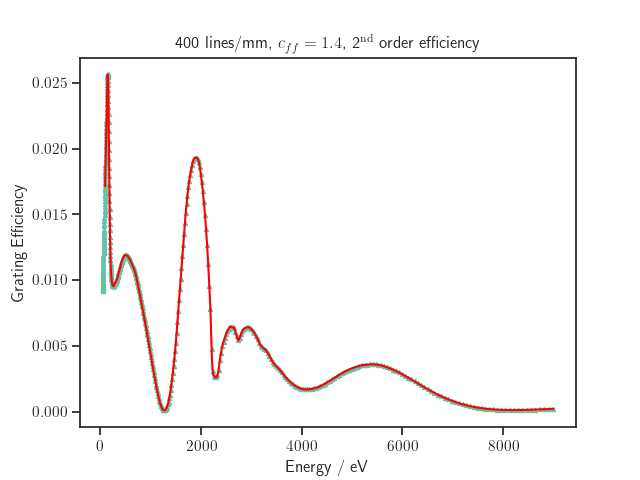

In [16]:
E, effc  = np.loadtxt('../B07_N400C1p4O2.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
plt.clf()
x = np.linspace(100,9000,10000)
plt.plot(x, inted(x), c= 'r')
plt.scatter(E,effc, s = 8, marker='^')
plt.title("400 lines/mm, $c_{ff} = 1.4$, 2$^\mathrm{nd}$ order efficiency")
plt.xlabel("Energy / eV")
plt.ylabel("Grating Efficiency")
#plt.xlim(500,3000)
plt.show()

In [3]:
E, flux = np.loadtxt('B07flux.dat',skiprows=1, unpack=True)

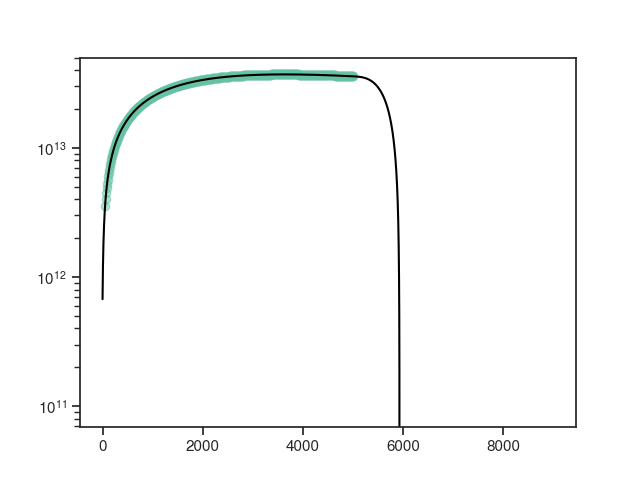

In [9]:
plt.clf()
plt.scatter(E, flux, alpha=0.5)
flux_int = ip.CubicSpline(E, flux)
x = np.linspace(0,9000,10000)
plt.plot(x, flux_int(x), c= 'black')
plt.semilogy()
#plt.semilogx()
plt.show()

In [9]:
2.53/1368

0.0018494152046783625

In [40]:
spectra = np.loadtxt('resultscff14o1upto3000.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))

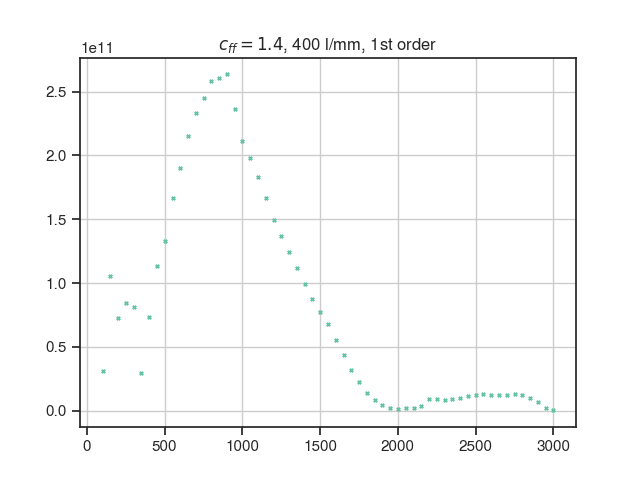

In [251]:
spectra1 = np.loadtxt('resultscff1p4o1upto3000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra1[:,0], spectra1[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm, 1st order")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')
#ax.semilogy()

In [11]:
import csv
import json

In [12]:
with open("resultscff14o1upto3000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

FileNotFoundError: [Errno 2] No such file or directory: 'resultscff14o1upto3000.csv'

In [13]:
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]


NameError: name 'data' is not defined

NameError: name 'oe1_int' is not defined

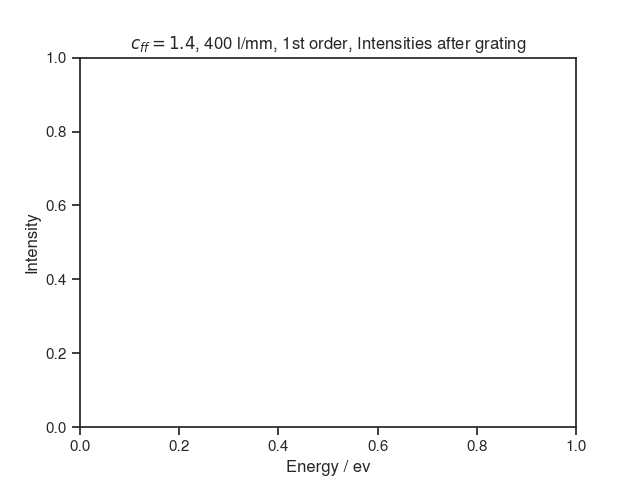

In [10]:
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()


In [126]:
E = [row[0] for row in intensities]
oe1_int = [row[1]['OE1']/50000 for row in intensities]
oe2_int = [row[1]['OE2']/row[1]['OE1'] for row in intensities]
oe3_int = [row[1]['OE3']/row[1]['OE2'] for row in intensities]
oe4_int = [row[1]['OE4']/row[1]['OE3'] for row in intensities]
oe5_int = [row[1]['OE5']/row[1]['OE4'] for row in intensities]
oe6_int = [row[1]['OE6']/row[1]['OE5'] for row in intensities]
oe7_int = [row[1]['OE7']/row[1]['OE6'] for row in intensities]
oe8_int = [row[1]['OE8']/row[1]['OE7'] for row in intensities]
oe9_int = [row[1]['OE9']/row[1]['OE8'] for row in intensities]

In [127]:
intensities

[[101.0,
  {'OE1': 48986.86065343197,
   'OE2': 16471.200762397126,
   'OE3': 15345.52741161628,
   'OE4': 15345.527411616282,
   'OE5': 15345.527411616282,
   'OE6': 15200.423114225443,
   'OE7': 3707.0551091002144,
   'OE8': 3684.120882689337,
   'OE9': 3639.4600085126112}],
 [151.0,
  {'OE1': 48181.80892101603,
   'OE2': 34370.299881450745,
   'OE3': 25259.533028354024,
   'OE4': 25259.533028354024,
   'OE5': 25259.533028354024,
   'OE6': 24682.52585738861,
   'OE7': 6655.106633415555,
   'OE8': 6520.375690551429,
   'OE9': 6352.12111113116}],
 [201.0,
  {'OE1': 47170.03574109177,
   'OE2': 44816.53195407169,
   'OE3': 19176.926651722806,
   'OE4': 19176.926651722806,
   'OE5': 19176.926651722806,
   'OE6': 18375.31339027886,
   'OE7': 4728.301340190019,
   'OE8': 4542.968153158912,
   'OE9': 4327.088356517128}],
 [251.0,
  {'OE1': 45861.41319220477,
   'OE2': 45861.41319220477,
   'OE3': 19630.1787263512,
   'OE4': 19630.1787263512,
   'OE5': 19630.1787263512,
   'OE6': 18336.57067

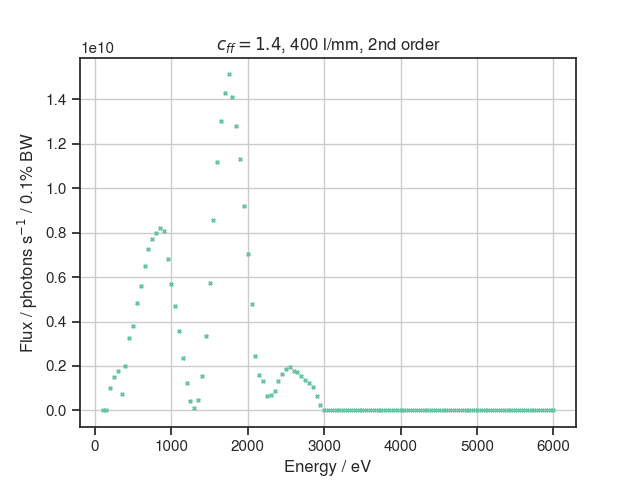

In [250]:
spectra2 = np.loadtxt('resultscff1p4o2upto3000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra2[:,0], spectra2[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm, 2nd order")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

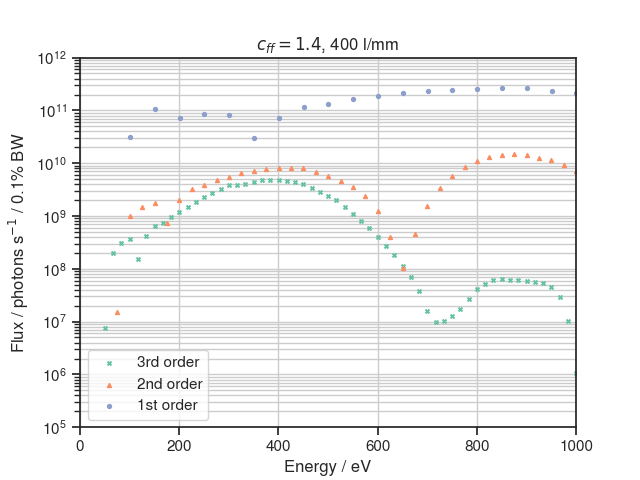

In [252]:
spectra3 = np.loadtxt('resultscff1p4o3upto9000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra3[:,0]/3, spectra3[:,3], s=8, marker='x', label="3rd order")
ax.scatter(spectra2[:,0]/2, spectra2[:,3], s=8, marker='^', label="2nd order")
ax.scatter(spectra1[:,0], spectra1[:,3], s=8, marker='o', label="1st order")

ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
ax.semilogy()
ax.set_xlim(0, 1000)
ax.set_ylim(1E5, 1E12)
ax.legend()
plugins.connect(fig, plugins.MousePosition(fontsize=14))
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

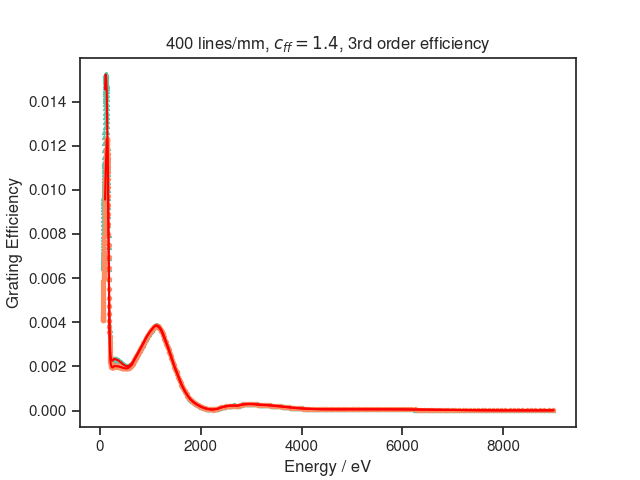

In [11]:
E, effc  = np.loadtxt('../B07_N400C1p4O3.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
plt.clf()
fig, ax = plt.subplots()
x = np.linspace(100,9000,10000)
ax.plot(x, inted(x), c= 'r')
ax.scatter(E,effc, s = 8, marker='^')
ax.set_title("400 lines/mm, $c_{ff} = 1.4$, 3rd order efficiency")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Grating Efficiency")
E, effc  = np.loadtxt('./B07cN4C1p4O3F35.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
plt.plot(x, inted(x), c= 'r')
plt.scatter(E,effc, s = 8, marker='o')
#plt.xlim(500,3000)
plt.show()

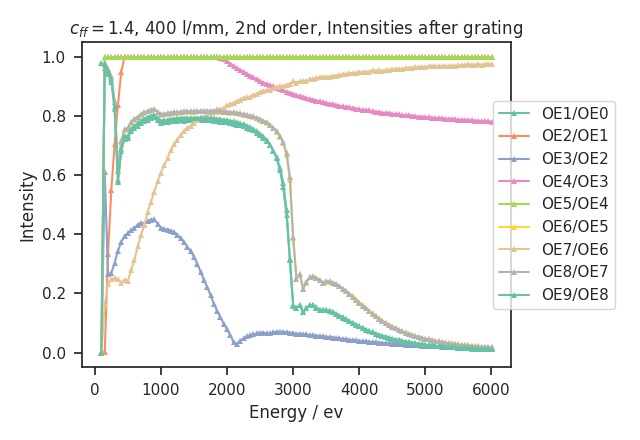

In [159]:
with open("resultscff14o2upto6000.csv", 'r') as f:
    reader = csv.reawith open("resultscff14o3upto9000F11.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()der(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]

except ZeroDivisionError:
    pass
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()


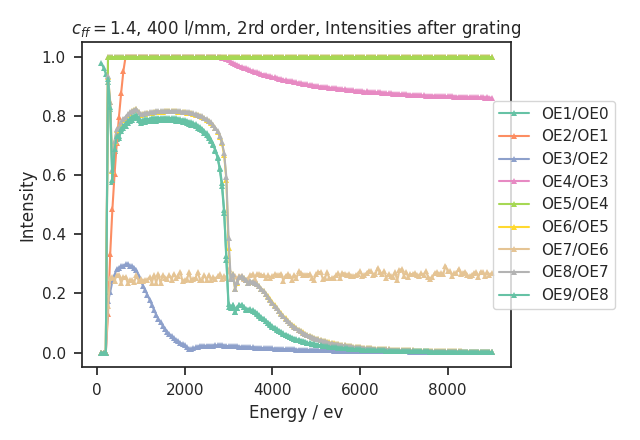

In [182]:
with open("resultscff14o3upto9000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]

except ZeroDivisionError:
    pass
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2rd order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()

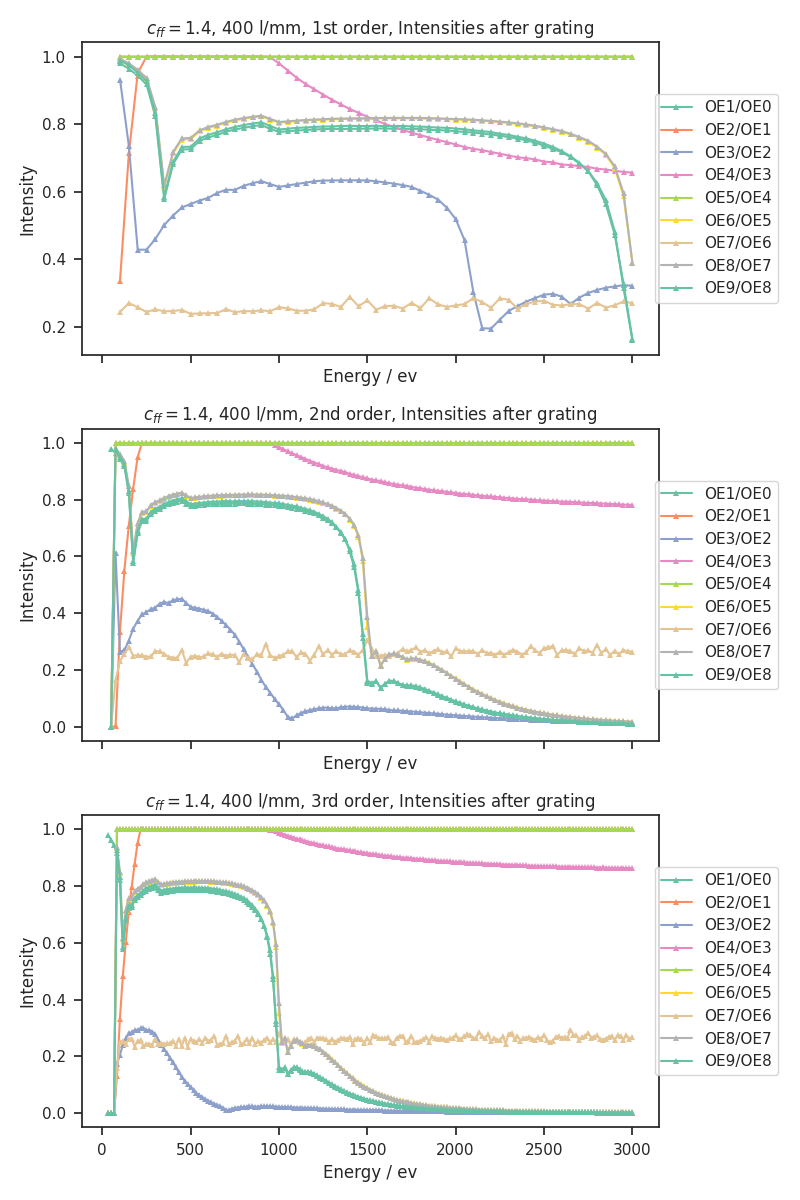

In [183]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True, figsize=(8,12))
with open("resultscff14o1upto3000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o2upto6000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax2.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax2.plot(E/2, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax2.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o3upto9000.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()
fig.savefig("cff1p4_ratio.png", dpi=300)


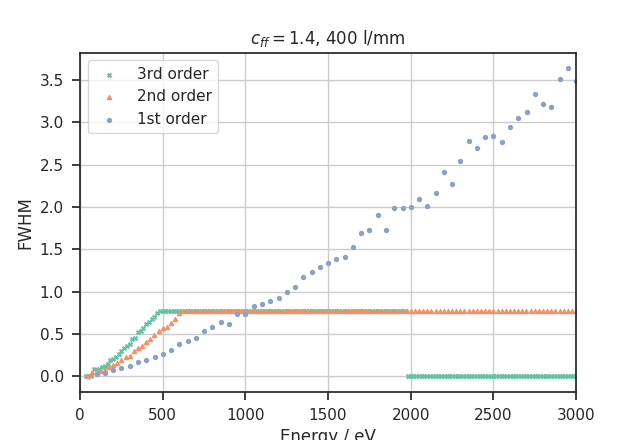

In [178]:
fig, ax = plt.subplots()
ax.scatter(spectra3[:,0]/3, spectra3[:,1], s=8, marker='x', label="3rd order")
ax.scatter(spectra2[:,0]/2, spectra2[:,1], s=8, marker='^', label="2nd order")
ax.scatter(spectra1[:,0], spectra1[:,1], s=8, marker='o', label="1st order")

ax.set_title(r"$c_{ff} = 1.4$, 400 l/mm")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("FWHM")
ax.grid(which='both')
ax.set_xlim(0, 3000)
#ax.semilogy()
ax.legend()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

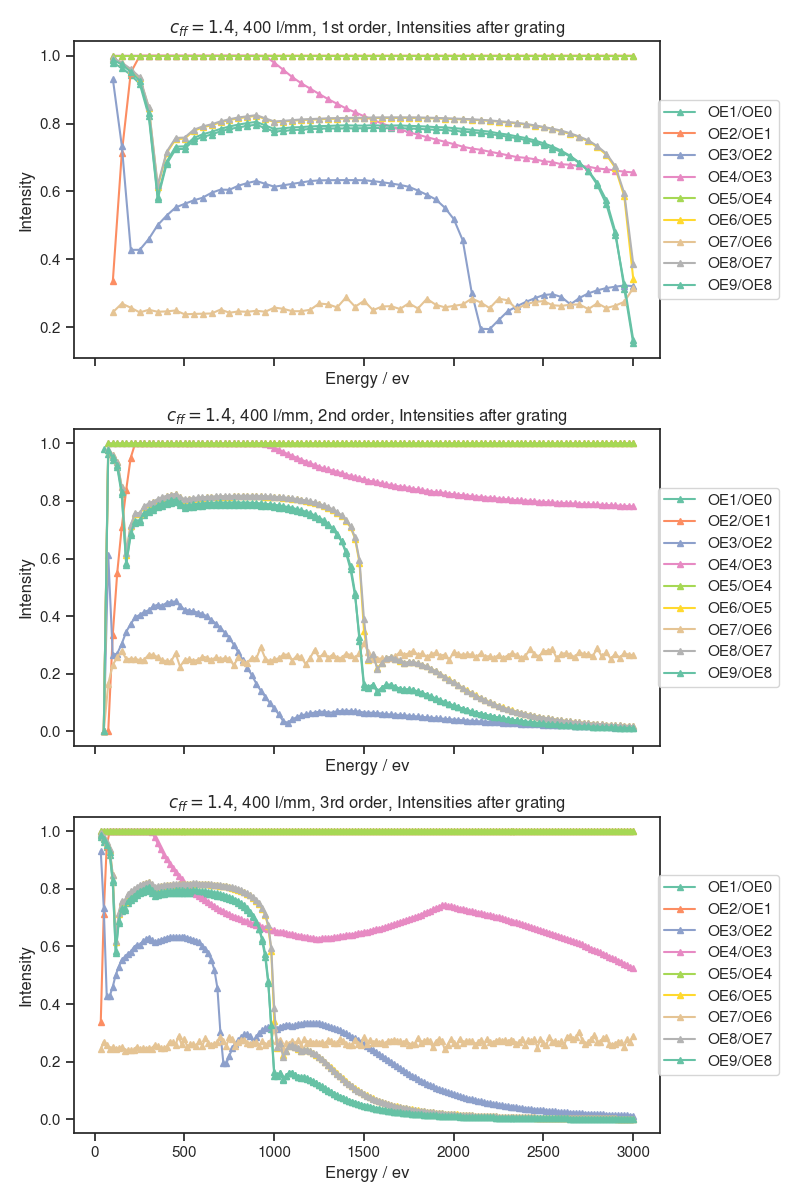

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True, figsize=(8,12))
with open("resultscff14o1upto3000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o2upto6000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax2.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax2.plot(E/2, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax2.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o3upto9000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()
fig.savefig("cff1p4_ratio.png", dpi=300)


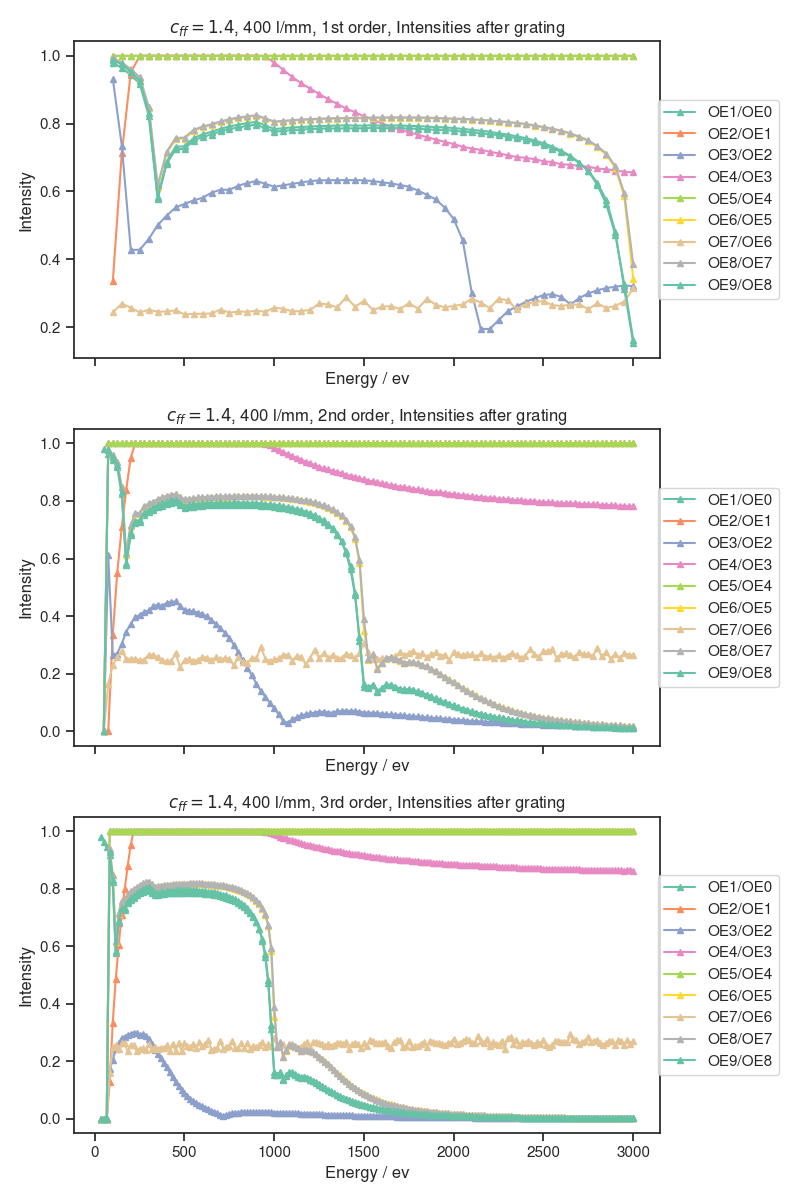

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True, figsize=(8,12))
with open("resultscff14o1upto3000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o2upto6000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax2.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2nd order, Intensities after grating')
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax2.plot(E/2, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax2.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff14o3upto9000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
plt.tight_layout()
fig.savefig("cff1p4_ratio.png", dpi=300)

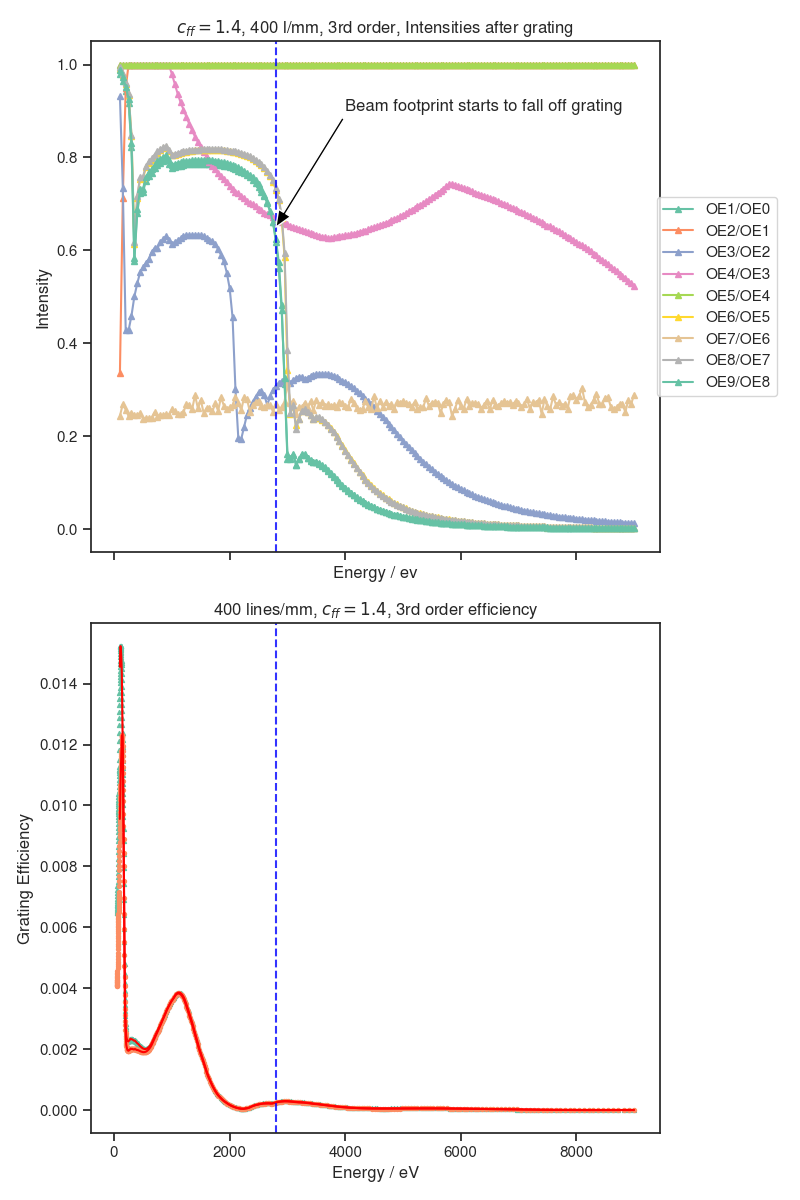

In [6]:
fig, (ax3, ax) = plt.subplots(2,1, sharex=True, figsize=(8, 12))
with open("resultscff14o3upto9000F11.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
E, effc  = np.loadtxt('../B07_N400C1p4O3.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
x = np.linspace(100,9000,10000)
ax.plot(x, inted(x), c= 'r')
ax.scatter(E,effc, s = 8, marker='^')
ax.set_title("400 lines/mm, $c_{ff} = 1.4$, 3rd order efficiency")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Grating Efficiency")
E, effc  = np.loadtxt('./B07cN4C1p4O3F35.dat', unpack=True)
inted = ip.CubicSpline(E, effc)
inted(200)
ax.plot(x, inted(x), c= 'r')
ax.scatter(E,effc, s = 8, marker='o')
ax.axvline(2800, c='blue', linestyle='--', alpha=0.8)
ax3.axvline(2800, c='blue', linestyle='--', alpha=0.8)
ax3.annotate('Beam footprint starts to fall off grating',(2800,0.65), (4000, 0.9), arrowprops=dict(facecolor='black', shrink=5, width=2, headwidth=10))
plt.tight_layout()
fig.savefig("3rdorder1p4combiplot.png", dpi=300)
#plt.xlim(500,3000)


In [14]:
spectra2_1 = np.loadtxt('resultscff2o1upto3000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
spectra2_2 = np.loadtxt('resultscff2o2upto6000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
spectra2_3 = np.loadtxt('resultscff2o3upto9000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))


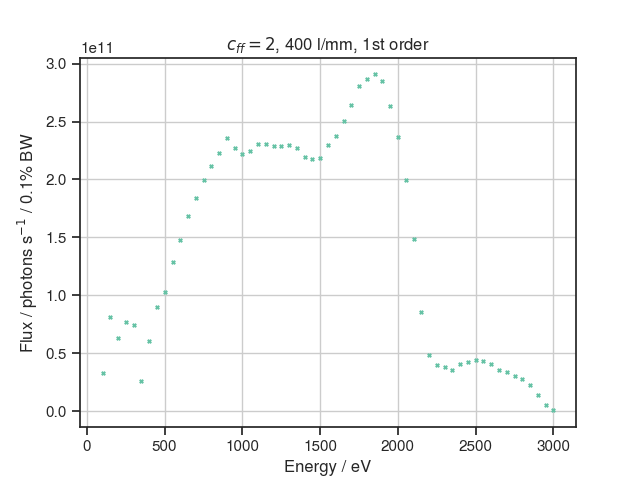

In [15]:
fig, ax = plt.subplots()
ax.scatter(spectra2_1[:,0], spectra2_1[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 2$, 400 l/mm, 1st order")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
fig.savefig("cff2firstorder.png", dpi=300)
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

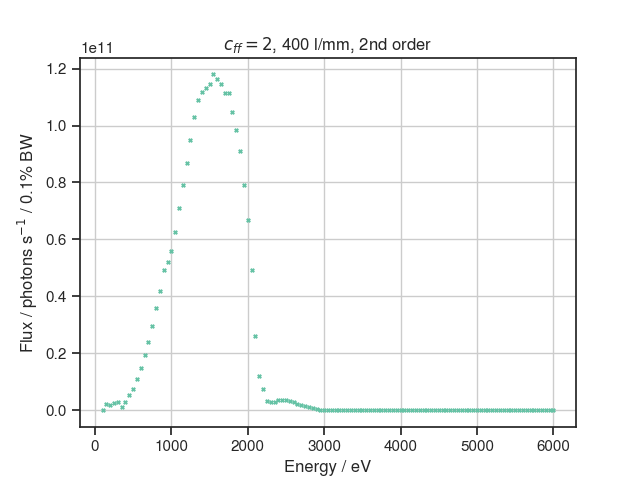

In [8]:
fig, ax = plt.subplots()
ax.scatter(spectra2_2[:,0], spectra2_2[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 2$, 400 l/mm, 2nd order")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
fig.savefig("cff2secondorder.png", dpi=300)
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

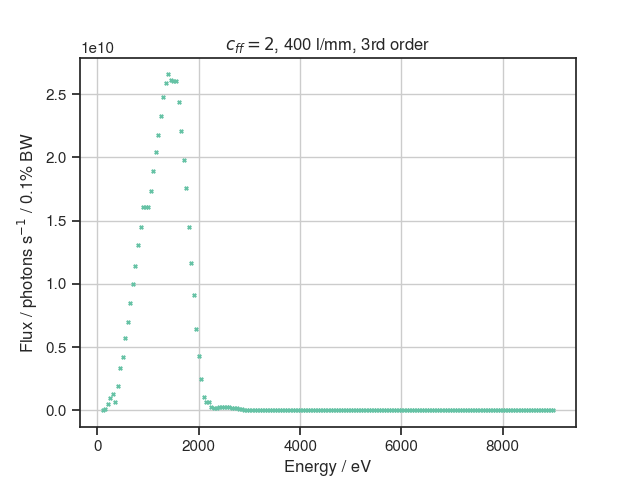

In [9]:
fig, ax = plt.subplots()
ax.scatter(spectra2_3[:,0], spectra2_3[:,3], s=6, marker='x')
ax.set_title(r"$c_{ff} = 2$, 400 l/mm, 3rd order")
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$ / 0.1% BW")
ax.grid(which='both')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
fig.savefig("cff2thirdorder.png", dpi=300)
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

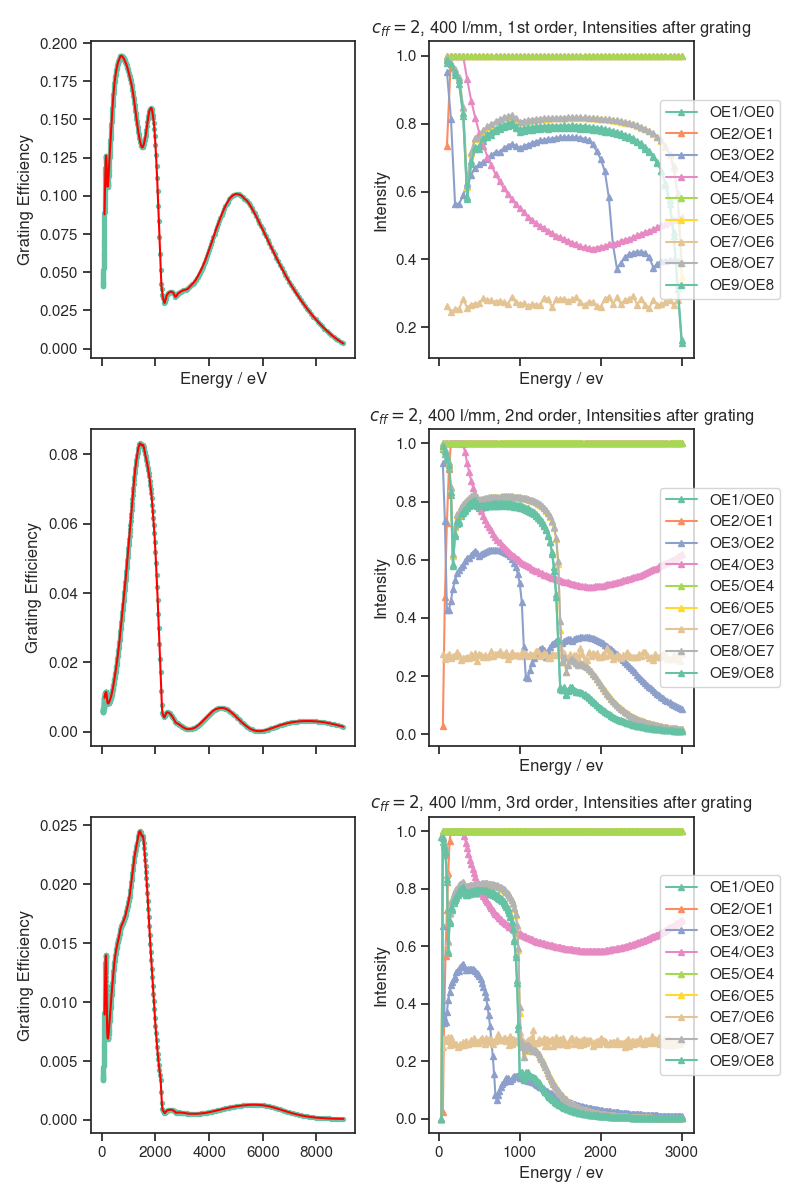

In [8]:
fig, ax = plt.subplots(3,2,sharex='col', figsize=(8,12))
ax1, ax2, ax3 = ax[:,1]
ax4, ax5, ax6 = ax[:,0]
with open("resultscff2o1upto3000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax1.set_title(r'$c_{ff} = 2$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff2o2upto6000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax2.set_title(r'$c_{ff} = 2$, 400 l/mm, 2nd order, Intensities after grating')
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax2.plot(E/2, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax2.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')

with open("resultscff2o3upto9000F35.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = np.array([row[0] for row in intensities])
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
ax3.set_title(r'$c_{ff} = 2$, 400 l/mm, 3rd order, Intensities after grating')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax3.plot(E/3, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax3.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')


E1, effc1  = np.loadtxt('./B07cN4C2p0O1F35.dat', unpack=True)
inted1 = ip.CubicSpline(E1, effc1)
ax4.plot(x, inted1(x), c= 'r')
ax4.set_xlabel('Energy / eV')
ax4.scatter(E1,effc1, s = 8, marker='o')
E2, effc2  = np.loadtxt('./B07cN4C2p0O2F35.dat', unpack=True)
inted2 = ip.CubicSpline(E2, effc2)
ax5.plot(x, inted2(x), c= 'r')
ax5.scatter(E2,effc2, s = 8, marker='o')
E3, effc3  = np.loadtxt('./B07cN4C2p0O3F35.dat', unpack=True)
inted3 = ip.CubicSpline(E3, effc3)
ax6.plot(x, inted3(x), c= 'r')
ax6.scatter(E3,effc3, s = 8, marker='o')

for axes in (ax4, ax5, ax6):
    axes.set_ylabel("Grating Efficiency")
plt.tight_layout()
fig.savefig("cff2combiplot.png", dpi=300)


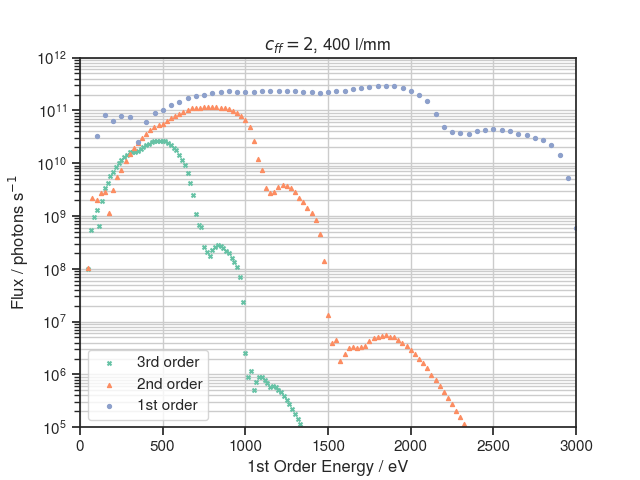

In [296]:
fig, ax = plt.subplots()
ax.scatter(spectra2_3[:,0]/3, spectra2_3[:,3], s=8, marker='x', label="3rd order")
ax.scatter(spectra2_2[:,0]/2, spectra2_2[:,3], s=8, marker='^', label="2nd order")
ax.scatter(spectra2_1[:,0], spectra2_1[:,3], s=8, marker='o', label="1st order")

ax.set_title(r"$c_{ff} = 2$, 400 l/mm")
ax.set_xlabel("1st Order Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$")
ax.grid(which='both')
ax.semilogy()
ax.set_xlim(0, 3000)
ax.set_ylim(1E5, 1E12)
ax.legend()
plugins.connect(fig, plugins.MousePosition(fontsize=14))
fig.savefig("cff2fluxes.png", dpi=400)
#fig.show()
#mpld3.save_html(fig, 'cff14firstorder.html')

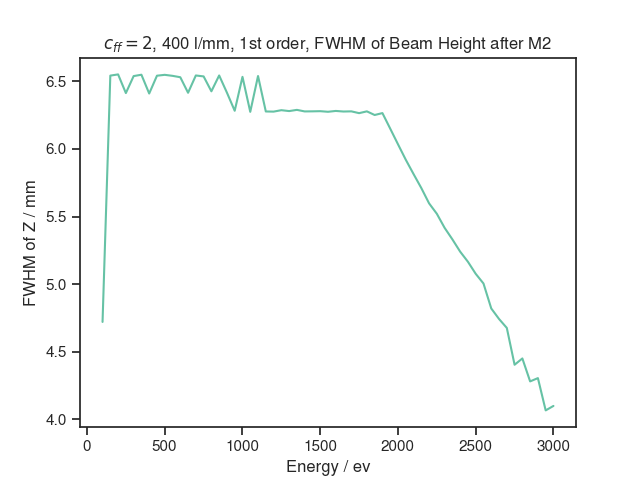

In [37]:
with open("resultscff2o1upto3000F35withheight.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-2])] for row in data[2:]]
height = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
"""
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
"""
fig, ax1 = plt.subplots()
ax1.set_title(r'$c_{ff} = 2$, 400 l/mm, 1st order, FWHM of Beam Height after M2')
ax1.set_ylabel('FWHM of Z / mm')
ax1.set_xlabel('Energy / ev')
"""
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
"""
height_after_mirror = [row[1]['OE3'] for row in height]
ax1.plot(E, height_after_mirror)
#ax1.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')


In [31]:
height[0][1]

{'OE1': 9.466382312457418,
 'OE2': 4.720523150720165,
 'OE3': 4.720526362755827,
 'OE4': 9.438110130161633,
 'OE5': 9.438110130161633,
 'OE6': 0.20922894915941112,
 'OE7': 6.193927079683785,
 'OE8': 2.4623429811066413,
 'OE9': 0.05264133301657159}

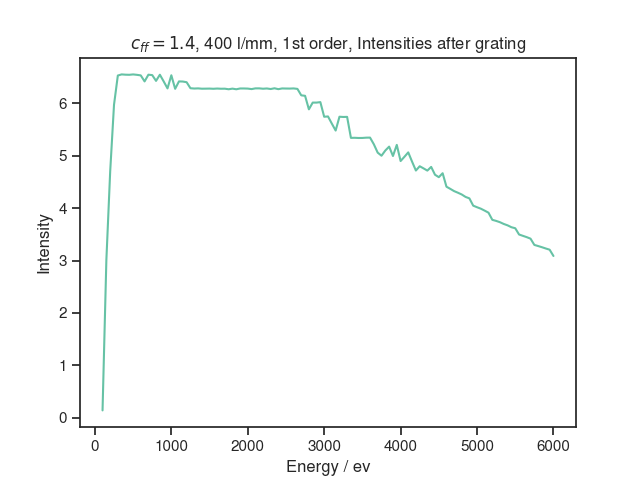

In [40]:
with open("resultscff2o2upto3000F35withheight.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-2])] for row in data[2:]]
height = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
"""
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
"""
fig, ax1 = plt.subplots()
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
"""
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
"""
height_after_mirror = [row[1]['OE3'] for row in height]
ax1.plot(E, height_after_mirror)

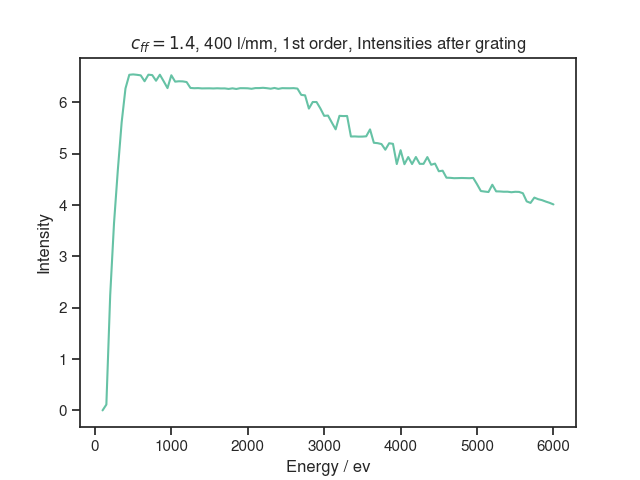

In [47]:
with open("resultscff2o3upto3000F35withheight.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-2])] for row in data[2:]]
height = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]
"""
try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]
except ZeroDivisionError:
    pass
"""
fig, ax1 = plt.subplots()
ax1.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 1st order, Intensities after grating')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Energy / ev')
"""
for i in np.arange(1, 10, 1):
    eval(f"ax1.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
"""
height_after_mirror = []
for row in height:
    if len(row[1]) != 0:
        height_after_mirror.append(row[1]['OE3'])
    else:
        height_after_mirror.append(0)
#height_after_mirror = [row[1]['OE3'] if len(row[1]) != 0 else 0 for row in height]
ax1.plot(E, height_after_mirror)

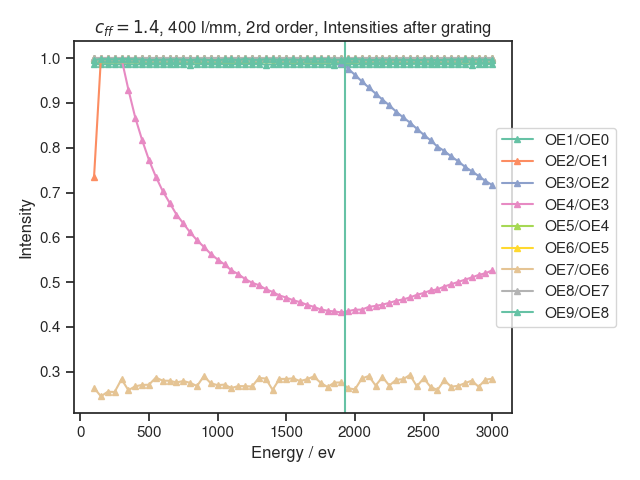

In [56]:
with open("resultscff2o1upto3000F35withheightwithrays.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
intensities = [[float(row[0]), eval(row[-1])] for row in data[2:]]
E = [row[0] for row in intensities]

try:
    oe1_int = [row[1]['OE1']/50000 for row in intensities]
    oe2_int = [row[1]['OE2']/row[1]['OE1'] if row[1]['OE1'] !=0 else 0 for row in intensities]
    oe3_int = [row[1]['OE3']/row[1]['OE2'] if row[1]['OE2'] !=0 else 0 for row in intensities]
    oe4_int = [row[1]['OE4']/row[1]['OE3'] if row[1]['OE3'] !=0 else 0 for row in intensities]
    oe5_int = [row[1]['OE5']/row[1]['OE4'] if row[1]['OE4'] !=0 else 0 for row in intensities]
    oe6_int = [row[1]['OE6']/row[1]['OE5'] if row[1]['OE5'] !=0 else 0 for row in intensities]
    oe7_int = [row[1]['OE7']/row[1]['OE6'] if row[1]['OE6'] !=0 else 0 for row in intensities]
    oe8_int = [row[1]['OE8']/row[1]['OE7'] if row[1]['OE7'] !=0 else 0 for row in intensities]
    oe9_int = [row[1]['OE9']/row[1]['OE8'] if row[1]['OE8'] !=0 else 0 for row in intensities]

except ZeroDivisionError:
    pass
"""
height = [[float(row[0]), eval(row[-1])] for row in data[2:]]
height_after_mirror = []
for row in height:
    if len(row[1]) != 0:
        height_after_mirror.append(row[1]['OE3'])
    else:
        height_after_mirror.append(0)
"""
fig, ax = plt.subplots()
ax.set_title(r'$c_{ff} = 1.4$, 400 l/mm, 2rd order, Intensities after grating')
ax.set_ylabel('Intensity')
ax.set_xlabel('Energy / ev')
for i in np.arange(1, 10, 1):
    eval(f"ax.plot(E, oe{i}_int,marker='^',markersize=4,label='OE{i}/OE{i-1}')")
ax.legend(ncol=1, bbox_to_anchor=(1.1,0.5), loc='center')
ax.axvline(1930)
plt.tight_layout()

In [52]:
intensities

[[101.0,
  {'OE1': 49368,
   'OE2': 36252,
   'OE3': 36252,
   'OE4': 36252,
   'OE5': 36252,
   'OE6': 36171,
   'OE7': 9535,
   'OE8': 9535,
   'OE9': 9497}],
 [151.0,
  {'OE1': 49337,
   'OE2': 49337,
   'OE3': 49337,
   'OE4': 49337,
   'OE5': 49337,
   'OE6': 49244,
   'OE7': 12044,
   'OE8': 12044,
   'OE9': 12024}],
 [201.0,
  {'OE1': 49351,
   'OE2': 49351,
   'OE3': 49351,
   'OE4': 49351,
   'OE5': 49351,
   'OE6': 49243,
   'OE7': 12551,
   'OE8': 12551,
   'OE9': 12521}],
 [251.0,
  {'OE1': 49329,
   'OE2': 49329,
   'OE3': 49329,
   'OE4': 49329,
   'OE5': 49329,
   'OE6': 49211,
   'OE7': 12518,
   'OE8': 12518,
   'OE9': 12487}],
 [301.0,
  {'OE1': 49339,
   'OE2': 49339,
   'OE3': 49339,
   'OE4': 49301,
   'OE5': 49301,
   'OE6': 49197,
   'OE7': 13915,
   'OE8': 13915,
   'OE9': 13892}],
 [351.0,
  {'OE1': 49333,
   'OE2': 49333,
   'OE3': 49333,
   'OE4': 45881,
   'OE5': 45881,
   'OE6': 45770,
   'OE7': 11824,
   'OE8': 11824,
   'OE9': 11798}],
 [401.0,
  {'OE1': 

In [254]:
df = pd.read_csv('resultscff2o1upto3000F35withheightwithrays.csv', skiprows=1)

In [260]:
df.keys

<bound method NDFrame.keys of          E      FWHM  Bandwidth          Flux    Intensity  \
0    101.0  0.017429   0.000372  3.315869e+10  8788.868607   
1    151.0  0.033867   0.000486  8.134577e+10  8936.322428   
2    201.0  0.049764   0.000540  6.349376e+10  5954.151560   
3    251.0  0.069959   0.000603  7.676520e+10  5322.960646   
4    301.0  0.089507   0.000584  7.399461e+10  4102.337804   
5    351.0  0.120352   0.000699  2.573987e+10   961.533736   
6    401.0  0.146375   0.000732  6.043705e+10  1803.364561   
7    451.0  0.174043   0.000761  9.027997e+10  2240.489159   
8    501.0  0.204408   0.000800  1.027181e+11  2166.384179   
9    551.0  0.234407   0.000791  1.283602e+11  2504.744805   
10   601.0  0.250409   0.000847  1.473658e+11  2494.447770   
11   651.0  0.300628   0.000898  1.687439e+11  2532.488091   
12   701.0  0.325256   0.000923  1.840198e+11  2543.109261   
13   751.0  0.353802   0.000950  1.997991e+11  2578.806306   
14   801.0  0.412157   0.000984  2.11842

In [35]:
dict_test.values()

dict_values([49368, 16599, 16599, 16599, 16599, 16558, 4038, 4038, 4020])

In [16]:
def calc_ratio(df, column = 'Intensity'):
    heading = {"Intensity": 'Intensity_dict', "Height":"Height_dict", "Rays": "Ray Dict"}
    E = df['E'].to_numpy()
    vals = df[heading[column]]
    evaluated_vals = [eval(row) for row in vals]
    #print(evaluated_vals)
    vals_list = np.array([np.array(list(row.values())) for row in evaluated_vals])
    offset_vals = np.array([np.hstack((row[0], row[:-1])) for row in vals_list])
    ratios = (vals_list/offset_vals)[:,1:]
    if column == 'Rays':
        return E, vals_list
    data = np.array([np.hstack((e, ratio)) for e, ratio in zip(E, ratios)])
    
    return data
    

In [17]:
def draw_ratio(df,ax, column= 'Intensity', return_lines=False, title = None, xlabel=None, ylabel=None):
    labels = {"Intensity":"Relative Intensity","Height": "Relative Beam Height","Rays": "Relative Ray Ratio"} 
    if column == "Rays":
        E, data = calc_ratio(df, column=column)
        labels = [f"OE{i+1}" for i in range(0,9)]
    else:
        data = calc_ratio(df, column=column)
        labels = [f"OE{i+2}/OE{i+1}" for i in range(9)]

    lines = []
    
    for i, label in zip(np.arange(0,10,1), labels):
        lines.append(ax.plot(E, data[0:,i], label=label, markersize=1, marker='^', linewidth=20-2*i))
    #lines = [l1, l2, l3, l4, l5, l6, l7, l8]
    if title != None: ax.set_title(title)
    if xlabel != None: ax.set_xlabel(xlabel)
    if ylabel != None: ax.set_ylabel(ylabel)
    return (lines, labels) if return_lines else None
        

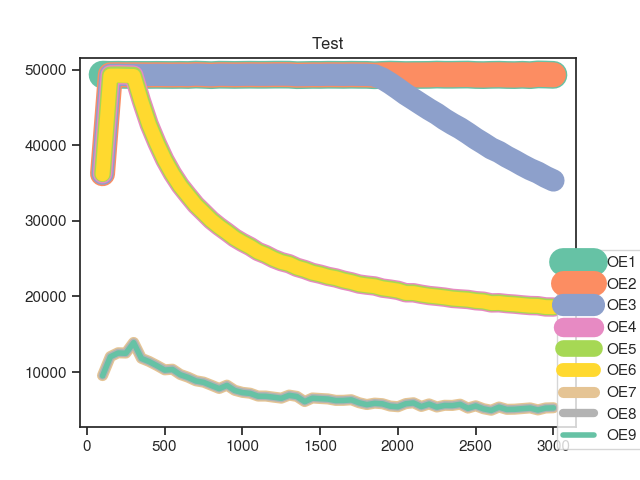

In [292]:
fig, ax = plt.subplots()
draw_ratio(df, ax, return_lines = False,title="Test", column='Rays')
ax.legend(loc=1, bbox_to_anchor=(1.15,0.5))

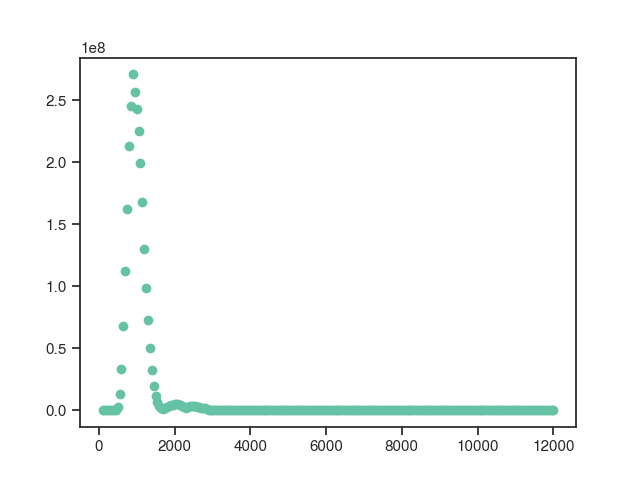

In [20]:
spectra_4 = np.loadtxt('resultscff1p4o4upto12000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra_4[:,0], spectra_4[:,3])

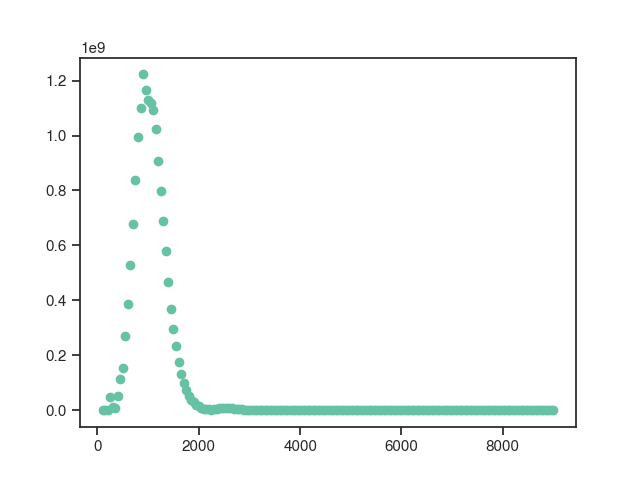

In [21]:
spectra_3 = np.loadtxt('resultscff1p4o3upto9000F35withheightwithrays.csv', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
fig, ax = plt.subplots()
ax.scatter(spectra_3[:,0], spectra_3[:,3])

## $c_\text{ff}=1.4$ Raytracing Analysis

In [19]:
list_names = [f"cff_1p4_o{i+1}" for i in range(5)]
files = [f"resultscff1p4o{i+1}upto{(i+1)*3000}F35withheightwithrays.csv" for i in range(5)]
list_of_data = []
for variable, file in zip(list_names, files):
    exec(f"{variable} = np.loadtxt('{file}', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))")
    exec(f"list_of_data.append({variable})")

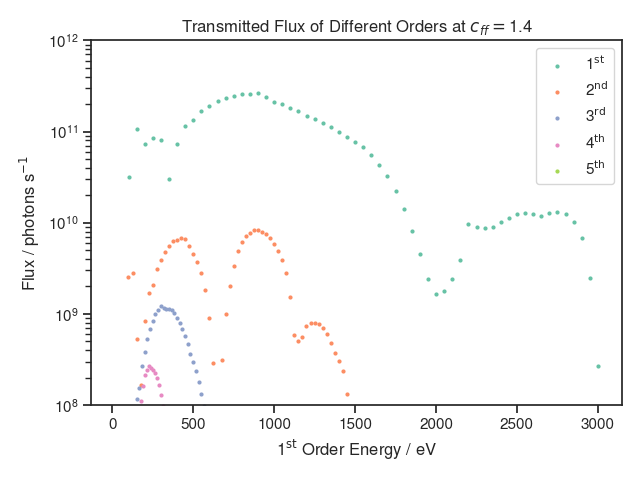

In [20]:
fig, ax = plt.subplots()
cff_1p4_o5 = np.loadtxt("resultscff1p4o5upto15000F35withheightwithrays_test.csv", skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
ax.scatter(cff_1p4_o1[:,0], cff_1p4_o1[:,3], s=4, label=r"1$^\mathrm{st}$")
ax.scatter(cff_1p4_o2[:,0]/2, cff_1p4_o2[:,3], s=4, label=r"2$^\mathrm{nd}$")
ax.scatter(cff_1p4_o3[:,0]/3, cff_1p4_o3[:,3], s=4, label=r"3$^\mathrm{rd}$")
ax.scatter(cff_1p4_o4[:,0]/4, cff_1p4_o4[:,3], s=4, label=r"4$^\mathrm{th}$")
ax.scatter(cff_1p4_o5[:,0]/5, cff_1p4_o5[:,3], s=4, label=r"5$^\mathrm{th}$")
ax.set_xlabel("1$^\mathrm{st}$ Order Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$")
ax.set_title("Transmitted Flux of Different Orders at $c_{ff}=$1.4")
ax.set_ylim((1E8, 1E12))
ax.semilogy()
ax.legend()
plt.tight_layout()

In [21]:
cff_1p4_o2_interp = ip.CubicSpline(cff_1p4_o2[:,0]/2, cff_1p4_o2[:,3])
cff_1p4_o3_interp = ip.CubicSpline(cff_1p4_o3[:,0]/3, cff_1p4_o3[:,3])
cff_1p4_o4_interp = ip.CubicSpline(cff_1p4_o4[:,0]/4, cff_1p4_o4[:,3])
cff_1p4_o5_interp = ip.CubicSpline(cff_1p4_o5[:,0]/5, cff_1p4_o5[:,3])


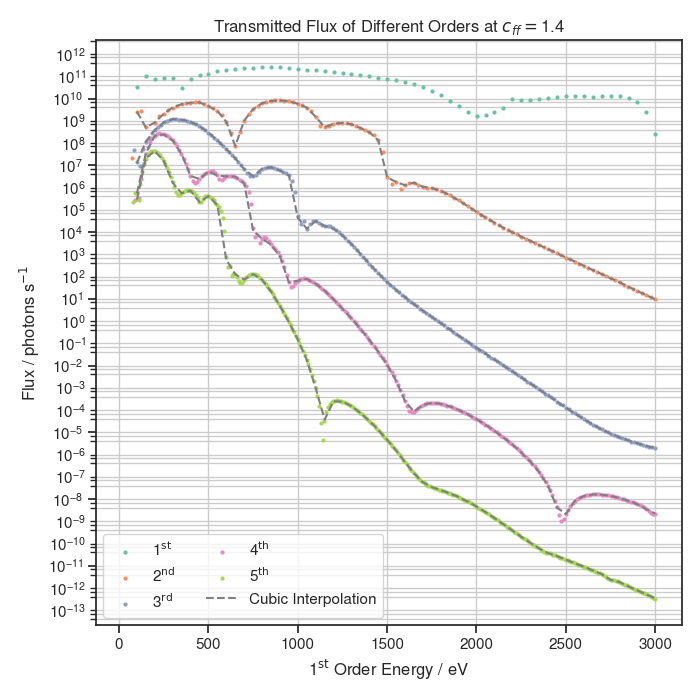

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
cff_1p4_o5 = np.loadtxt("resultscff1p4o5upto15000F35withheightwithrays_test.csv", skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
from matplotlib import pyplot as plt, ticker as mticker

ax.scatter(cff_1p4_o1[:,0], cff_1p4_o1[:,3], s=4, label=r"1$^\mathrm{st}$")
ax.scatter(cff_1p4_o2[:,0]/2, cff_1p4_o2[:,3], s=4, label=r"2$^\mathrm{nd}$")
ax.scatter(cff_1p4_o3[:,0]/3, cff_1p4_o3[:,3], s=4, label=r"3$^\mathrm{rd}$")
ax.scatter(cff_1p4_o4[:,0]/4, cff_1p4_o4[:,3], s=4, label=r"4$^\mathrm{th}$")
ax.scatter(cff_1p4_o5[:,0]/5, cff_1p4_o5[:,3], s=4, label=r"5$^\mathrm{th}$")
ax.plot(cff_1p4_o1[:,0], cff_1p4_o2_interp(cff_1p4_o1[:,0]), linestyle='--', c= 'tab:gray')
ax.plot(cff_1p4_o1[:,0], cff_1p4_o3_interp(cff_1p4_o1[:,0]), linestyle='--', c= 'tab:gray')
ax.plot(cff_1p4_o1[:,0], cff_1p4_o4_interp(cff_1p4_o1[:,0]), linestyle='--', c= 'tab:gray')
ax.plot(cff_1p4_o1[:,0], cff_1p4_o5_interp(cff_1p4_o1[:,0]), linestyle='--', c= 'tab:gray', label='Cubic Interpolation')

ax.set_xlabel("1$^\mathrm{st}$ Order Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$")
ax.set_title("Transmitted Flux of Different Orders at $c_{ff}=$1.4")
ax.grid(which='both')
#ax.set_ylim(1E-5, 1E12)
#ax.set_yticks(np.arange(1E-5, 1E12, 1000))
#ax.set_ylim((1E9, 1E12))
ax.semilogy()
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=np.arange(0.1, 1, 0.3)))

ax.legend(fancybox=True, ncol=2)
plt.tight_layout()

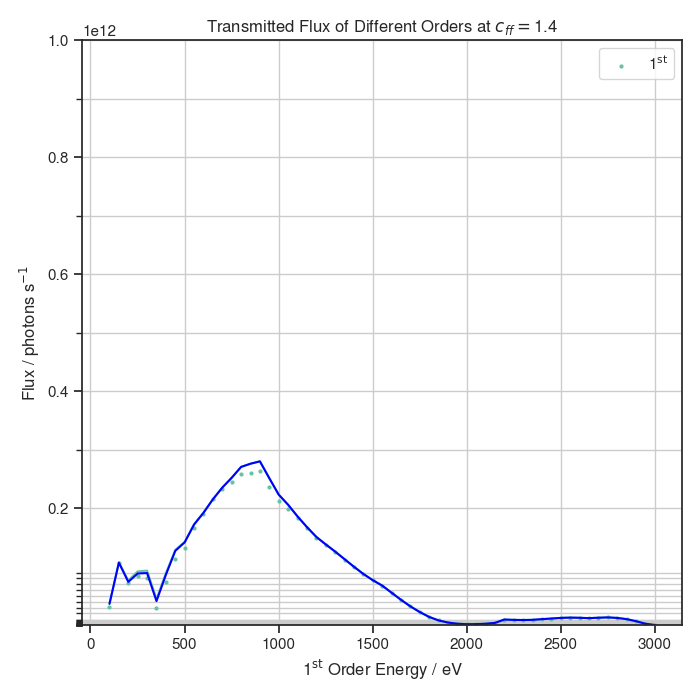

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
cff_1p4_o5 = np.loadtxt("resultscff1p4o5upto15000F35withheightwithrays_test.csv", skiprows=2, delimiter=',', usecols=(0,1,2,3,4))
from matplotlib import pyplot as plt, ticker as mticker

ax.scatter(cff_1p4_o1[:,0], cff_1p4_o1[:,3], s=4, label=r"1$^\mathrm{st}$")
photodiode = cff_1p4_o1[:,3] + 2* cff_1p4_o2_interp(cff_1p4_o1[:,0]) + 3* cff_1p4_o3_interp(cff_1p4_o1[:,0]) + 4* cff_1p4_o4_interp(cff_1p4_o1[:,0]) + 5* cff_1p4_o5_interp(cff_1p4_o1[:,0])
ax.plot(cff_1p4_o1[:,0], photodiode)
ax.plot(cff_1p4_o1[:,0], cff_1p4_o1[:,3] + 2* cff_1p4_o2_interp(cff_1p4_o1[:,0]), c='b')
ax.set_xlabel("1$^\mathrm{st}$ Order Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$")
ax.set_title("Transmitted Flux of Different Orders at $c_{ff}=$1.4")
ax.grid(which='both')
ax.set_ylim(1E-5, 1E12)
#ax.set_yticks(np.arange(1E-5, 1E12, 1000))
ax.set_ylim((1E7, 1E12))
#ax.semilogy()
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=np.arange(0.2, 1, 0.1)))

ax.legend(fancybox=True, ncol=2)
plt.tight_layout()

In [24]:
cff1p4_measured = np.loadtxt("b07measured.txt", skiprows=1, usecols=(2,3))

In [25]:
cff1p4_measured

array([[1.99999830e+02, 1.81274739e+09],
       [2.00999796e+02, 1.80396431e+09],
       [2.01999762e+02, 1.79503409e+09],
       ...,
       [1.99793842e+03, 1.46334689e+10],
       [1.99893838e+03, 1.46077855e+10],
       [1.99993835e+03, 1.45793697e+10]])

[]

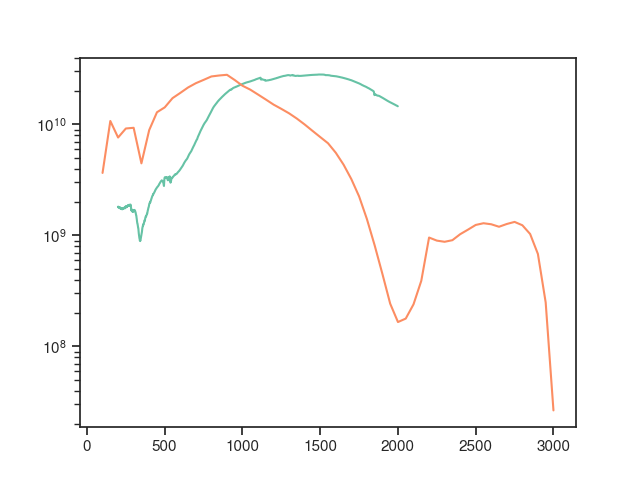

In [26]:
fig,ax = plt.subplots()
ax.plot(cff1p4_measured[:,0], cff1p4_measured[:,1])
ax.plot(cff_1p4_o1[:,0], 0.1*photodiode)

ax.semilogy()

In [27]:
import h5py

In [28]:
cff1p4hdf = h5py.File("b07-1-82243.nxs", 'r')

In [29]:
a = np.array([])

In [30]:
print(cff1p4hdf.get('entry1/before_scan/pgm_mirror_x/pgm_mirror_x')[()])

-27.0017


In [31]:
cff1p4hdf.get('entry1/before_scan/').keys()

<KeysViewHDF5 ['SR570_31_bias_voltage', 'SR570_31_bias_voltage_status', 'SR570_31_filter_highpass', 'SR570_31_filter_lowpass', 'SR570_31_filter_type', 'SR570_31_gain_mode', 'SR570_31_sensitivity', 'SR570_31_sensitivity_units', 'SR570_32_bias_voltage', 'SR570_32_bias_voltage_status', 'SR570_32_filter_highpass', 'SR570_32_filter_lowpass', 'SR570_32_filter_type', 'SR570_32_gain_mode', 'SR570_32_sensitivity', 'SR570_32_sensitivity_units', 'SR570_33_bias_voltage', 'SR570_33_bias_voltage_status', 'SR570_33_filter_highpass', 'SR570_33_filter_lowpass', 'SR570_33_filter_type', 'SR570_33_gain_mode', 'SR570_33_sensitivity', 'SR570_33_sensitivity_units', 'SR570_34_bias_voltage', 'SR570_34_bias_voltage_status', 'SR570_34_filter_highpass', 'SR570_34_filter_lowpass', 'SR570_34_filter_type', 'SR570_34_gain_mode', 'SR570_34_sensitivity', 'SR570_34_sensitivity_units', 'SR830_channel_one', 'SR830_channel_two', 'SR830_sensitivity', 'SR830_time_constant', 'analyser_sledge', 'bl07c_space_01', 'bl07c_space_0

In [32]:
list_names = [f"cscff_1p4_o{i+1}" for i in range(5)]
files = [f"./correctslits/resultscff1p4o{i+1}upto{(i+1)*3000}F35withheightwithrays.csv" for i in range(5)]
list_of_data = []
for variable, file in zip(list_names, files):
    exec(f"{variable} = np.loadtxt('{file}', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))")
    exec(f"list_of_data.append({variable})")

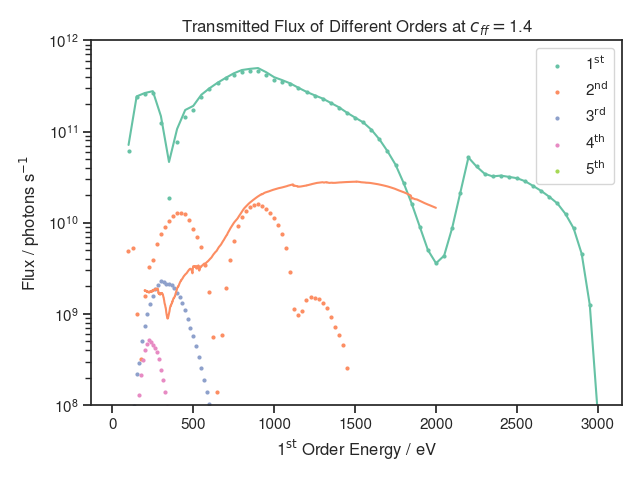

In [35]:
fig, ax = plt.subplots()
ax.scatter(cscff_1p4_o1[:,0], cscff_1p4_o1[:,3], s=4, label=r"1$^\mathrm{st}$")
ax.scatter(cscff_1p4_o2[:,0]/2, cscff_1p4_o2[:,3], s=4, label=r"2$^\mathrm{nd}$")
ax.scatter(cscff_1p4_o3[:,0]/3, cscff_1p4_o3[:,3], s=4, label=r"3$^\mathrm{rd}$")
ax.scatter(cscff_1p4_o4[:,0]/4, cscff_1p4_o4[:,3], s=4, label=r"4$^\mathrm{th}$")
ax.scatter(cscff_1p4_o5[:,0]/5, cscff_1p4_o5[:,3], s=4, label=r"5$^\mathrm{th}$")
ax.set_xlabel("1$^\mathrm{st}$ Order Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$")
ax.set_title("Transmitted Flux of Different Orders at $c_{ff}=$1.4")
ax.set_ylim((1E8, 1E12))
ax.semilogy()
ax.legend()
cff_1p4_o2_interp = ip.CubicSpline(cscff_1p4_o2[:,0]/2, cscff_1p4_o2[:,3])
cff_1p4_o3_interp = ip.CubicSpline(cscff_1p4_o3[:,0]/3, cscff_1p4_o3[:,3])
cff_1p4_o4_interp = ip.CubicSpline(cscff_1p4_o4[:,0]/4, cscff_1p4_o4[:,3])
cff_1p4_o5_interp = ip.CubicSpline(cscff_1p4_o5[:,0]/5, cscff_1p4_o5[:,3])
photodiode = cscff_1p4_o1[:,3] + 2* cff_1p4_o2_interp(cff_1p4_o1[:,0]) + 3* cff_1p4_o3_interp(cff_1p4_o1[:,0]) + 4* cff_1p4_o4_interp(cff_1p4_o1[:,0]) + 5* cff_1p4_o5_interp(cff_1p4_o1[:,0])
ax.plot(cscff_1p4_o1[:,0], photodiode)
ax.plot(cff1p4_measured[:,0], cff1p4_measured[:,1])
#ax.set_xlim(300, 2600)
plt.tight_layout()

In [6]:
list_names_2 = [f"cscff_2p0_o{i+1}" for i in range(5)]
files = [f"./correctslits/resultscff2p0o{i+1}upto{(i+1)*3000}F35withheightwithrays.csv" for i in range(5)]
list_of_data_2 = []
for variable, file in zip(list_names_2, files):
    exec(f"{variable} = np.loadtxt('{file}', skiprows=2, delimiter=',', usecols=(0,1,2,3,4))")
    exec(f"list_of_data_2.append({variable})")

In [7]:
cff2p0_measured = np.loadtxt("b07measured.txt", skiprows=1, usecols=(0,1))

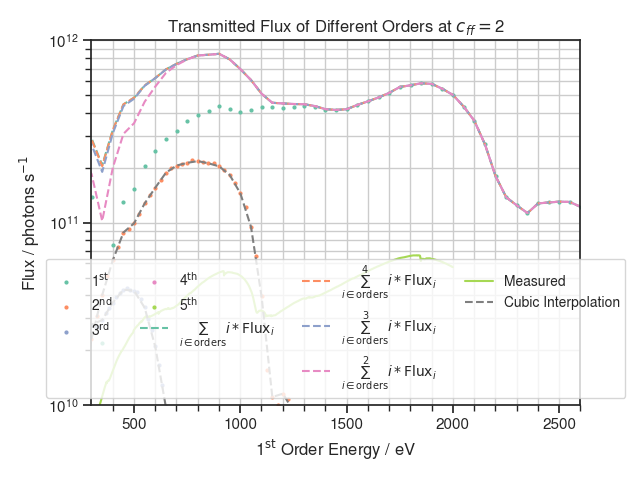

In [37]:
fig, ax = plt.subplots()
ax.scatter(cscff_2p0_o1[:,0], cscff_2p0_o1[:,3], s=4, label=r"1$^\mathrm{st}$")
ax.scatter(cscff_2p0_o2[:,0]/2, cscff_2p0_o2[:,3], s=4, label=r"2$^\mathrm{nd}$")
ax.scatter(cscff_2p0_o3[:,0]/3, cscff_2p0_o3[:,3], s=4, label=r"3$^\mathrm{rd}$")
ax.scatter(cscff_2p0_o4[:,0]/4, cscff_2p0_o4[:,3], s=4, label=r"4$^\mathrm{th}$")
ax.scatter(cscff_2p0_o5[:,0]/5, cscff_2p0_o5[:,3], s=4, label=r"5$^\mathrm{th}$")
ax.set_xlabel("1$^\mathrm{st}$ Order Energy / eV")
ax.set_ylabel("Flux / photons s$^{-1}$")
ax.set_title("Transmitted Flux of Different Orders at $c_{ff}=$2")
ax.set_ylim((1E10, 1E12))
ax.semilogy()
ax.set_xticks(np.arange(400, 2700, 100), minor=True)
cff_2p0_o2_interp = ip.CubicSpline(cscff_2p0_o2[:,0]/2, cscff_2p0_o2[:,3])
cff_2p0_o3_interp = ip.CubicSpline(cscff_2p0_o3[:,0]/3, cscff_2p0_o3[:,3])
cff_2p0_o4_interp = ip.CubicSpline(cscff_2p0_o4[:,0]/4, cscff_2p0_o4[:,3])
cff_2p0_o5_interp = ip.CubicSpline(cscff_2p0_o5[:,0]/5, cscff_2p0_o5[:,3])
photodiode = cscff_2p0_o1[:,3] + 2* cff_2p0_o2_interp(cscff_2p0_o1[:,0]) + 3* cff_2p0_o3_interp(cscff_2p0_o1[:,0]) + 4* cff_2p0_o4_interp(cscff_2p0_o1[:,0]) + 5* cff_2p0_o5_interp(cscff_2p0_o1[:,0])
ax.plot(cscff_2p0_o1[:,0], photodiode, linestyle='--', label=r"$\sum_{i\in \mathrm{orders}} i*\mathrm{Flux}_i$")
photodiode = cscff_2p0_o1[:,3] + 2* cff_2p0_o2_interp(cscff_2p0_o1[:,0]) + 3* cff_2p0_o3_interp(cscff_2p0_o1[:,0]) + 4* cff_2p0_o4_interp(cscff_2p0_o1[:,0]) #+ 5* cff_2p0_o5_interp(cscff_2p0_o1[:,0])
ax.plot(cscff_2p0_o1[:,0], photodiode, linestyle='--', label=r"$\sum_{i\in \mathrm{orders}}^4 i*\mathrm{Flux}_i$")
photodiode = cscff_2p0_o1[:,3] + 2* cff_2p0_o2_interp(cscff_2p0_o1[:,0]) + 3* cff_2p0_o3_interp(cscff_2p0_o1[:,0]) #+ 4* cff_2p0_o4_interp(cscff_2p0_o1[:,0]) + 5* cff_2p0_o5_interp(cscff_2p0_o1[:,0])
ax.plot(cscff_2p0_o1[:,0], photodiode, linestyle='--', label=r"$\sum_{i\in \mathrm{orders}}^3 i*\mathrm{Flux}_i$")
photodiode = cscff_2p0_o1[:,3] + 2* cff_2p0_o2_interp(cscff_2p0_o1[:,0]) #+ 3* cff_2p0_o3_interp(cscff_2p0_o1[:,0]) + 4* cff_2p0_o4_interp(cscff_2p0_o1[:,0]) + 5* cff_2p0_o5_interp(cscff_2p0_o1[:,0])

ax.plot(cscff_2p0_o1[:,0], photodiode, linestyle='--', label=r"$\sum_{i\in \mathrm{orders}}^2 i*\mathrm{Flux}_i$")
ax.plot(cff2p0_measured[:,0], cff2p0_measured[:,1], label="Measured")
ax.plot(cscff_2p0_o1[:,0], cff_2p0_o2_interp(cscff_2p0_o1[:,0]), linestyle='--', c= 'tab:gray')
ax.plot(cscff_2p0_o1[:,0], cff_2p0_o3_interp(cscff_2p0_o1[:,0]), linestyle='--', c= 'tab:gray')
ax.plot(cscff_2p0_o1[:,0], cff_2p0_o4_interp(cscff_2p0_o1[:,0]), linestyle='--', c= 'tab:gray')
ax.plot(cscff_2p0_o1[:,0], cff_2p0_o5_interp(cscff_2p0_o1[:,0]), linestyle='--', c= 'tab:gray', label='Cubic Interpolation')
ax.grid(which='both')
ax.set_xlim(300, 2600)
ax.legend(ncol=4, fontsize='small', loc='lower center')
plt.tight_layout()
#fig.savefig('cff2measured.pdf')